# ⚖️ RAG Evaluation: Recall-Precision Trade-offs

This notebook explores the critical trade-offs between recall and precision in RAG systems, helping you understand how to optimize for your specific use case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 📊 Understanding Recall vs Precision in RAG

In RAG systems, we face fundamental trade-offs between:

- **Recall**: The fraction of relevant documents that are retrieved
- **Precision**: The fraction of retrieved documents that are relevant

These trade-offs manifest at multiple levels in the RAG pipeline.

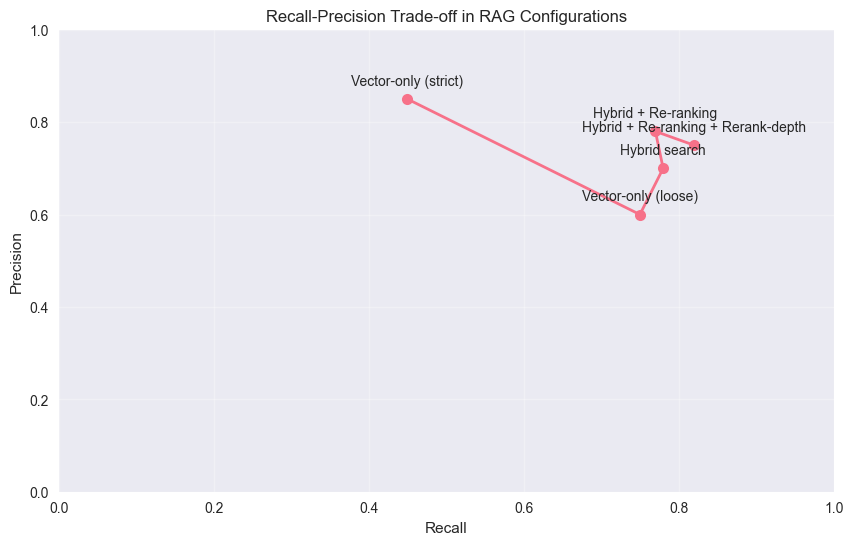

In [2]:
def plot_recall_precision_curve(recall_values: List[float], precision_values: List[float], labels: List[str]):
    """
    Plot recall-precision curve
    """
    plt.figure(figsize=(10, 6))
    plt.plot(recall_values, precision_values, marker='o', linewidth=2, markersize=8)
    
    # Annotate points
    for i, label in enumerate(labels):
        plt.annotate(label, (recall_values[i], precision_values[i]), 
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Recall-Precision Trade-off in RAG Configurations')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

# Example recall-precision values for different RAG configurations
configs = [
    "Vector-only (strict)",
    "Vector-only (loose)",
    "Hybrid search",
    "Hybrid + Re-ranking",
    "Hybrid + Re-ranking + Rerank-depth"
]

recall_vals = [0.45, 0.75, 0.78, 0.77, 0.82]
precision_vals = [0.85, 0.60, 0.70, 0.78, 0.75]

plot_recall_precision_curve(recall_vals, precision_vals, configs)

## 🧪 Experimenting with Retrieval Parameters

Let's examine how different retrieval parameters affect the recall-precision trade-off.

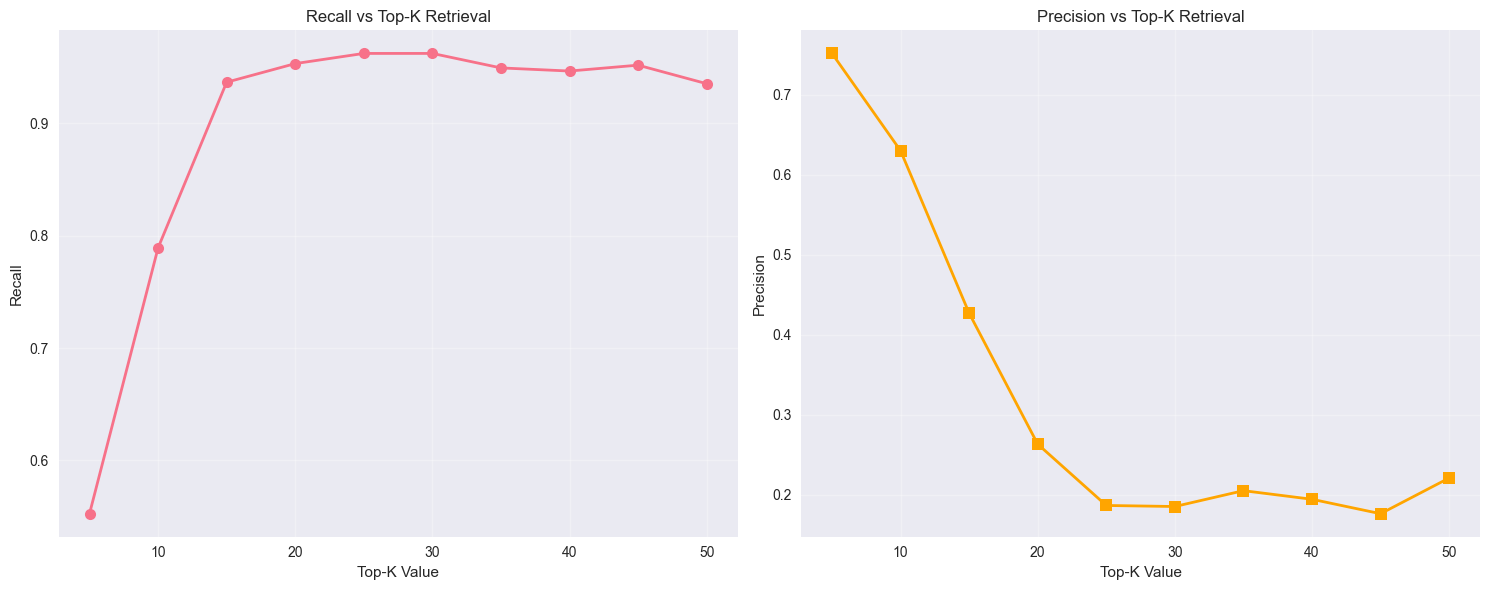

Recall-Precision Trade-off for Different Top-K Values:
   Top-K  Recall  Precision  F1-Score
0      5   0.553      0.752     0.637
1     10   0.789      0.630     0.701
2     15   0.937      0.427     0.587
3     20   0.953      0.263     0.413
4     25   0.962      0.187     0.313
5     30   0.962      0.185     0.311
6     35   0.949      0.205     0.337
7     40   0.947      0.194     0.322
8     45   0.952      0.176     0.298
9     50   0.935      0.221     0.357


In [3]:
def simulate_retrieval_performance(top_k: int, threshold: float = None) -> Tuple[float, float]:
    """
    Simulate retrieval performance based on top_k parameter
    In a real scenario, this would call your RAG system
    """
    # Simulated relationship: increasing top_k generally increases recall but decreases precision
    recall = min(0.3 + 0.05 * top_k, 0.95)  # Cap at 0.95
    precision = max(0.9 - 0.03 * top_k, 0.2)  # Floor at 0.2
    
    # Add some randomness to make it more realistic
    recall += np.random.normal(0, 0.02)
    precision += np.random.normal(0, 0.02)
    
    # Ensure values stay within bounds
    recall = max(0, min(1, recall))
    precision = max(0, min(1, precision))
    
    return recall, precision

# Test different top-k values
top_k_values = range(5, 51, 5)
recalls = []
precisions = []

for k in top_k_values:
    recall, precision = simulate_retrieval_performance(k)
    recalls.append(recall)
    precisions.append(precision)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Recall vs Top-K
ax1.plot(top_k_values, recalls, marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Top-K Value')
ax1.set_ylabel('Recall')
ax1.set_title('Recall vs Top-K Retrieval')
ax1.grid(True, alpha=0.3)

# Precision vs Top-K
ax2.plot(top_k_values, precisions, marker='s', linewidth=2, markersize=8, color='orange')
ax2.set_xlabel('Top-K Value')
ax2.set_ylabel('Precision')
ax2.set_title('Precision vs Top-K Retrieval')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the trade-off values
results_df = pd.DataFrame({
    'Top-K': top_k_values,
    'Recall': recalls,
    'Precision': precisions,
    'F1-Score': [2*(r*p)/(r+p) for r, p in zip(recalls, precisions)]
})

print("Recall-Precision Trade-off for Different Top-K Values:")
print(results_df.round(3))

## 🔄 Before/After: Hybrid Search Impact

Let's compare retrieval performance before and after implementing hybrid search.

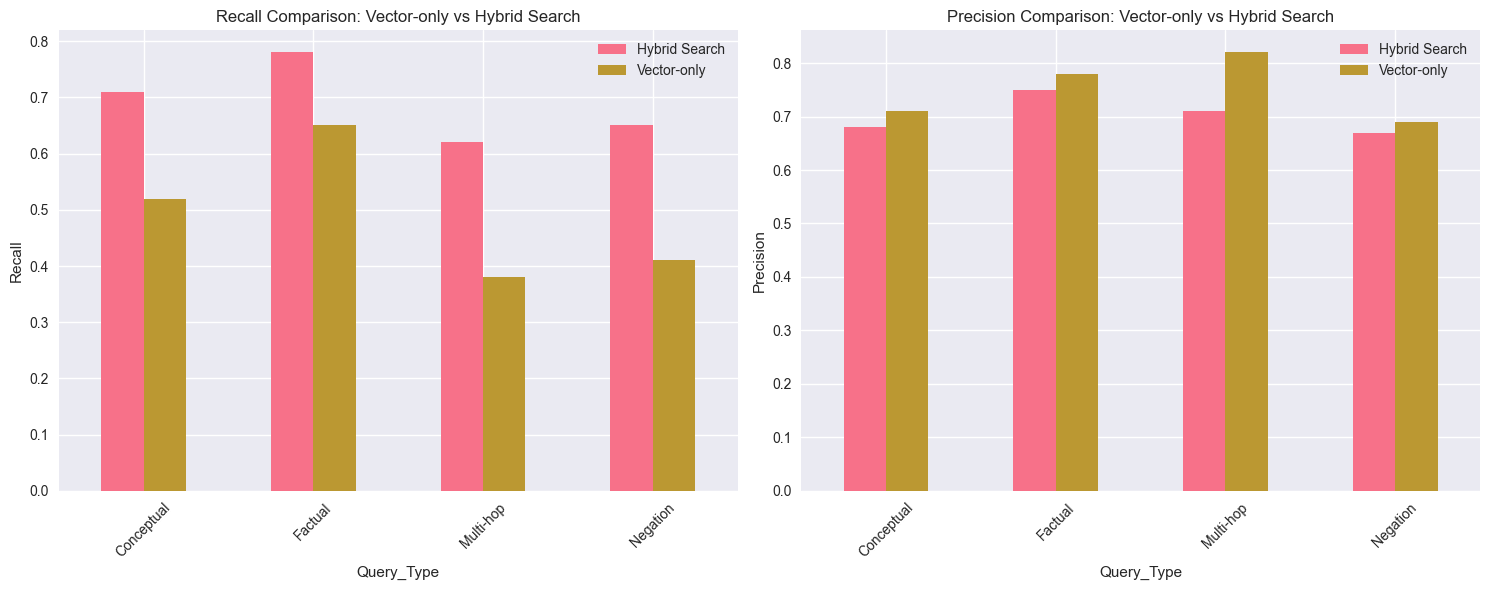

Detailed Comparison:
          Method  Query_Type  Recall  Precision
0    Vector-only     Factual    0.65       0.78
1  Hybrid Search     Factual    0.78       0.75
2    Vector-only  Conceptual    0.52       0.71
3  Hybrid Search  Conceptual    0.71       0.68
4    Vector-only   Multi-hop    0.38       0.82
5  Hybrid Search   Multi-hop    0.62       0.71
6    Vector-only    Negation    0.41       0.69
7  Hybrid Search    Negation    0.65       0.67

Improvement Summary:
Factual     : Recall ++0.130, Precision -0.030
Conceptual  : Recall ++0.190, Precision -0.030
Multi-hop   : Recall ++0.240, Precision -0.110
Negation    : Recall ++0.240, Precision -0.020


In [4]:
def compare_search_methods():
    """
    Compare vector-only vs hybrid search performance
    """
    # Simulated performance data
    methods = ['Vector-only', 'Hybrid Search']
    
    # Performance metrics for different query types
    query_types = ['Factual', 'Conceptual', 'Multi-hop', 'Negation']
    
    vector_only = {
        'Factual': (0.65, 0.78),
        'Conceptual': (0.52, 0.71),
        'Multi-hop': (0.38, 0.82),
        'Negation': (0.41, 0.69)
    }
    
    
    hybrid_search = {
        'Factual': (0.78, 0.75),
        'Conceptual': (0.71, 0.68),
        'Multi-hop': (0.62, 0.71),
        'Negation': (0.65, 0.67)
    }
    
    # Create comparison dataframe
    comparison_data = []
    for qtype in query_types:
        vo_recall, vo_precision = vector_only[qtype]
        hs_recall, hs_precision = hybrid_search[qtype]
        
        comparison_data.extend([
            {'Method': 'Vector-only', 'Query_Type': qtype, 'Recall': vo_recall, 'Precision': vo_precision},
            {'Method': 'Hybrid Search', 'Query_Type': qtype, 'Recall': hs_recall, 'Precision': hs_precision}
        ])
    
    df = pd.DataFrame(comparison_data)
    
    # Pivot for easier visualization
    recall_pivot = df.pivot(index='Query_Type', columns='Method', values='Recall')
    precision_pivot = df.pivot(index='Query_Type', columns='Method', values='Precision')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    recall_pivot.plot(kind='bar', ax=ax1)
    ax1.set_title('Recall Comparison: Vector-only vs Hybrid Search')
    ax1.set_ylabel('Recall')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    precision_pivot.plot(kind='bar', ax=ax2)
    ax2.set_title('Precision Comparison: Vector-only vs Hybrid Search')
    ax2.set_ylabel('Precision')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Detailed Comparison:")
    print(df.round(3))
    
    # Calculate improvements
    print("\nImprovement Summary:")
    for qtype in query_types:
        vo_recall, vo_precision = vector_only[qtype]
        hs_recall, hs_precision = hybrid_search[qtype]
        
        recall_imp = hs_recall - vo_recall
        precision_imp = hs_precision - vo_precision
        
        print(f"{qtype:12s}: Recall +{recall_imp:+.3f}, Precision {precision_imp:+.3f}")

compare_search_methods()

## 📈 Re-ranking Impact Analysis

Let's analyze how re-ranking affects the position of relevant documents in the results.

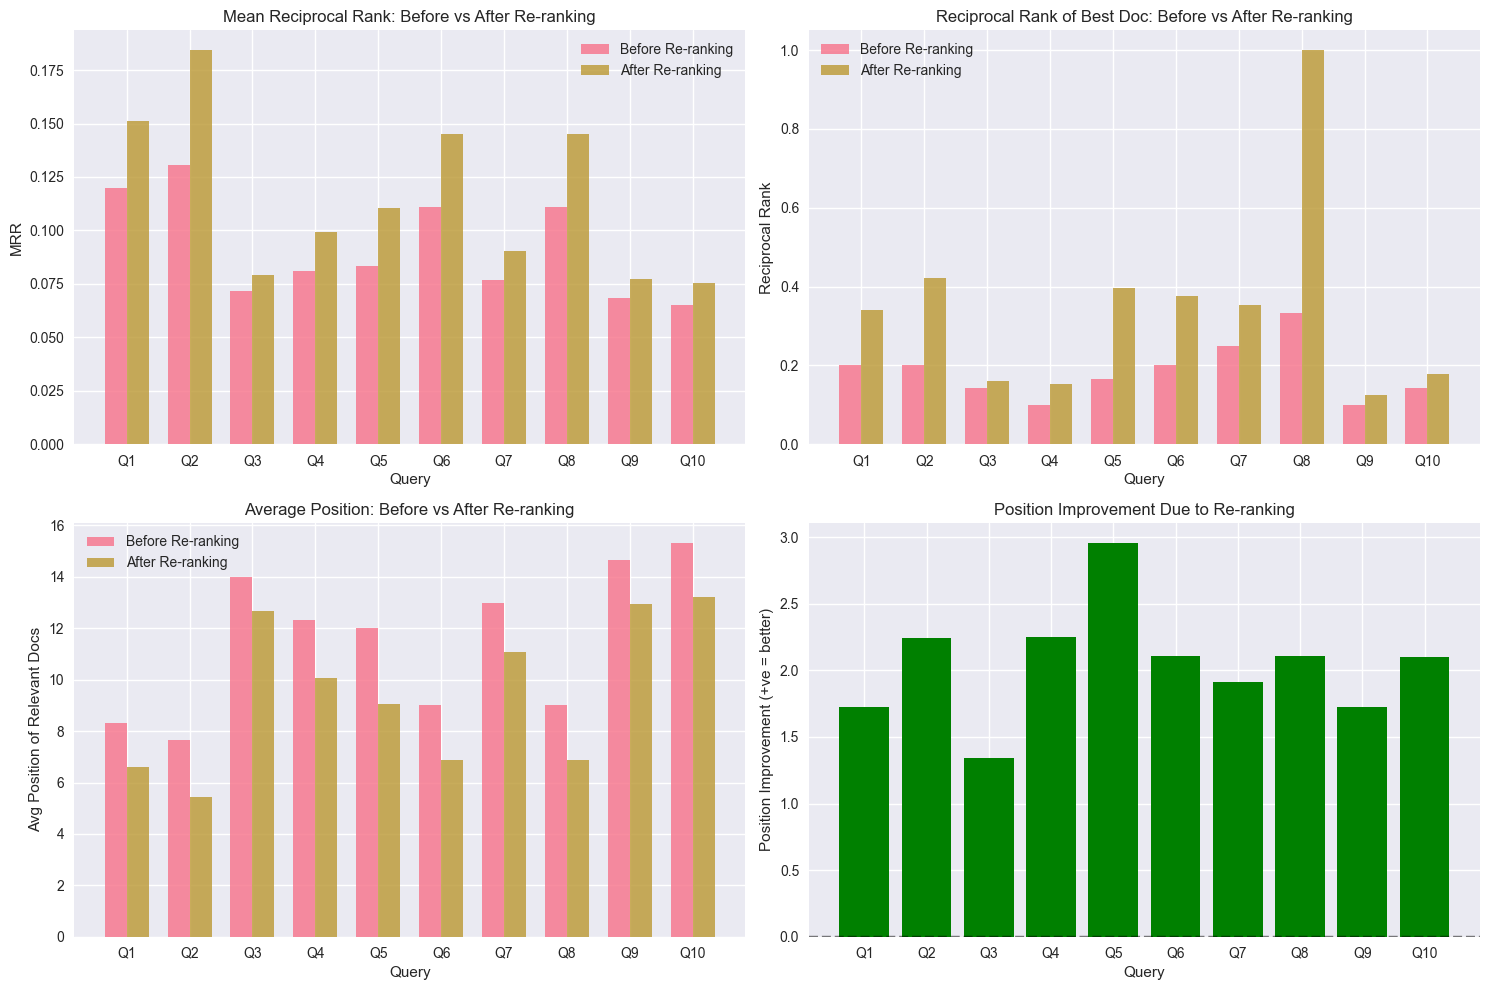

Re-ranking Impact Summary:
Average MRR before: 0.092
Average MRR after:  0.116
MRR improvement:   +2.39%

Average position before: 11.53
Average position after:  9.49
Position improvement:   +2.05 positions


In [5]:
def analyze_rerank_impact():
    """
    Analyze how re-ranking affects document positioning
    """
    # Simulated data: positions of relevant documents before and after re-ranking
    queries = [f"Q{i}" for i in range(1, 11)]
    
    # Positions of relevant documents (lower is better)
    before_rerank = [np.random.choice(range(1, 21), size=3, replace=False) for _ in queries]  # Top 20
    after_rerank = []
    
    for positions in before_rerank:
        # Simulate re-ranking improvement: relevant docs move up in rank
        new_positions = []
        for pos in positions:
            # On average, docs move up 2 positions, with some variance
            new_pos = max(1, pos - np.random.uniform(0.5, 3.5))
            new_positions.append(new_pos)
        after_rerank.append(sorted(new_positions))  # Keep in order
    
    # Calculate metrics
    mrr_before = [1/np.mean(positions) for positions in before_rerank]
    mrr_after = [1/np.mean(positions) for positions in after_rerank]
    
    # Calculate reciprocal rank for the highest-ranked relevant doc
    rr_before = [1/min(positions) for positions in before_rerank]
    rr_after = [1/min(positions) for positions in after_rerank]
    
    # Plot comparison
    x = np.arange(len(queries))
    width = 0.35
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # MRR comparison
    ax1.bar(x - width/2, mrr_before, width, label='Before Re-ranking', alpha=0.8)
    ax1.bar(x + width/2, mrr_after, width, label='After Re-ranking', alpha=0.8)
    ax1.set_xlabel('Query')
    ax1.set_ylabel('MRR')
    ax1.set_title('Mean Reciprocal Rank: Before vs After Re-ranking')
    ax1.legend()
    ax1.set_xticks(x)
    ax1.set_xticklabels(queries)
    
    # RR comparison
    ax2.bar(x - width/2, rr_before, width, label='Before Re-ranking', alpha=0.8)
    ax2.bar(x + width/2, rr_after, width, label='After Re-ranking', alpha=0.8)
    ax2.set_xlabel('Query')
    ax2.set_ylabel('Reciprocal Rank')
    ax2.set_title('Reciprocal Rank of Best Doc: Before vs After Re-ranking')
    ax2.legend()
    ax2.set_xticks(x)
    ax2.set_xticklabels(queries)
    
    # Average position comparison
    avg_before = [np.mean(positions) for positions in before_rerank]
    avg_after = [np.mean(positions) for positions in after_rerank]
    
    ax3.bar(x - width/2, avg_before, width, label='Before Re-ranking', alpha=0.8)
    ax3.bar(x + width/2, avg_after, width, label='After Re-ranking', alpha=0.8)
    ax3.set_xlabel('Query')
    ax3.set_ylabel('Avg Position of Relevant Docs')
    ax3.set_title('Average Position: Before vs After Re-ranking')
    ax3.legend()
    ax3.set_xticks(x)
    ax3.set_xticklabels(queries)
    
    # Improvement in positions
    improvement = [b - a for b, a in zip(avg_before, avg_after)]
    ax4.bar(x, improvement, color=['green' if imp > 0 else 'red' for imp in improvement])
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax4.set_xlabel('Query')
    ax4.set_ylabel('Position Improvement (+ve = better)')
    ax4.set_title('Position Improvement Due to Re-ranking')
    ax4.set_xticks(x)
    ax4.set_xticklabels(queries)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("Re-ranking Impact Summary:")
    print(f"Average MRR before: {np.mean(mrr_before):.3f}")
    print(f"Average MRR after:  {np.mean(mrr_after):.3f}")
    print(f"MRR improvement:   {(np.mean(mrr_after) - np.mean(mrr_before))*100:+.2f}%")
    
    print(f"\nAverage position before: {np.mean(avg_before):.2f}")
    print(f"Average position after:  {np.mean(avg_after):.2f}")
    print(f"Position improvement:   {np.mean(avg_before) - np.mean(avg_after):+.2f} positions")

analyze_rerank_impact()

## 🎯 Choosing the Right Balance

Different applications require different recall-precision balances. Let's explore how to choose the right configuration.

In [6]:
def recommend_configuration(use_case: str):
    """
    Recommend RAG configuration based on use case
    """
    configs = {
        "High Recall (e.g., Research Assistant)": {
            "approach": "Hybrid search with high top-k and re-ranking",
            "focus": "Minimize false negatives - better to retrieve too much than miss important info",
            "metrics": "Prioritize context_recall and MRR",
            "trade-offs": "Higher latency, more irrelevant results"
        },
        "High Precision (e.g., Customer Support)": {
            "approach": "Strict vector search with re-ranking and validation",
            "focus": "Minimize false positives - only return highly confident answers",
            "metrics": "Prioritize faithfulness and precision",
            "trade-offs": "May miss some relevant info, higher chance of 'I don't know'"
        },
        "Balanced (e.g., General QA)": {
            "approach": "Hybrid search with moderate parameters",
            "focus": "Good balance of coverage and accuracy",
            "metrics": "F1-score, overall user satisfaction",
            "trade-offs": "Compromise on both extremes"
        },
        "Low Latency (e.g., Real-time Chatbot)": {
            "approach": "Optimized vector search with caching",
            "focus": "Fast response times with acceptable accuracy",
            "metrics": "Latency, throughput, minimal accuracy threshold",
            "trade-offs": "Reduced accuracy for speed"
        }
    }
    
    if use_case in configs:
        config = configs[use_case]
        print(f"Recommended Configuration for {use_case}:")
        print(f"Approach: {config['approach']}")
        print(f"Focus: {config['focus']}")
        print(f"Metrics: {config['metrics']}")
        print(f"Trade-offs: {config['trade-offs']}")
    else:
        print(f"Unknown use case: {use_case}")
        print("Available use cases:", list(configs.keys()))

# Demonstrate recommendations for different use cases
use_cases = [
    "High Recall (e.g., Research Assistant)",
    "High Precision (e.g., Customer Support)",
    "Balanced (e.g., General QA)",
    "Low Latency (e.g., Real-time Chatbot)"
]

for uc in use_cases:
    recommend_configuration(uc)
    print()

Recommended Configuration for High Recall (e.g., Research Assistant):
Approach: Hybrid search with high top-k and re-ranking
Focus: Minimize false negatives - better to retrieve too much than miss important info
Metrics: Prioritize context_recall and MRR
Trade-offs: Higher latency, more irrelevant results

Recommended Configuration for High Precision (e.g., Customer Support):
Approach: Strict vector search with re-ranking and validation
Focus: Minimize false positives - only return highly confident answers
Metrics: Prioritize faithfulness and precision
Trade-offs: May miss some relevant info, higher chance of 'I don't know'

Recommended Configuration for Balanced (e.g., General QA):
Approach: Hybrid search with moderate parameters
Focus: Good balance of coverage and accuracy
Metrics: F1-score, overall user satisfaction
Trade-offs: Compromise on both extremes

Recommended Configuration for Low Latency (e.g., Real-time Chatbot):
Approach: Optimized vector search with caching
Focus: Fast 

## 🧠 Key Insights

1. **Recall-Precision Trade-off**: Increasing one typically decreases the other
2. **Use Case Drives Configuration**: Different applications require different balances
3. **Hybrid Search Benefits**: Generally improves recall with minimal precision loss
4. **Re-ranking Value**: Improves precision by reordering results based on relevance
5. **Parameter Tuning**: Top-K and threshold values significantly impact performance
6. **Evaluation is Iterative**: Continuously measure and adjust based on results